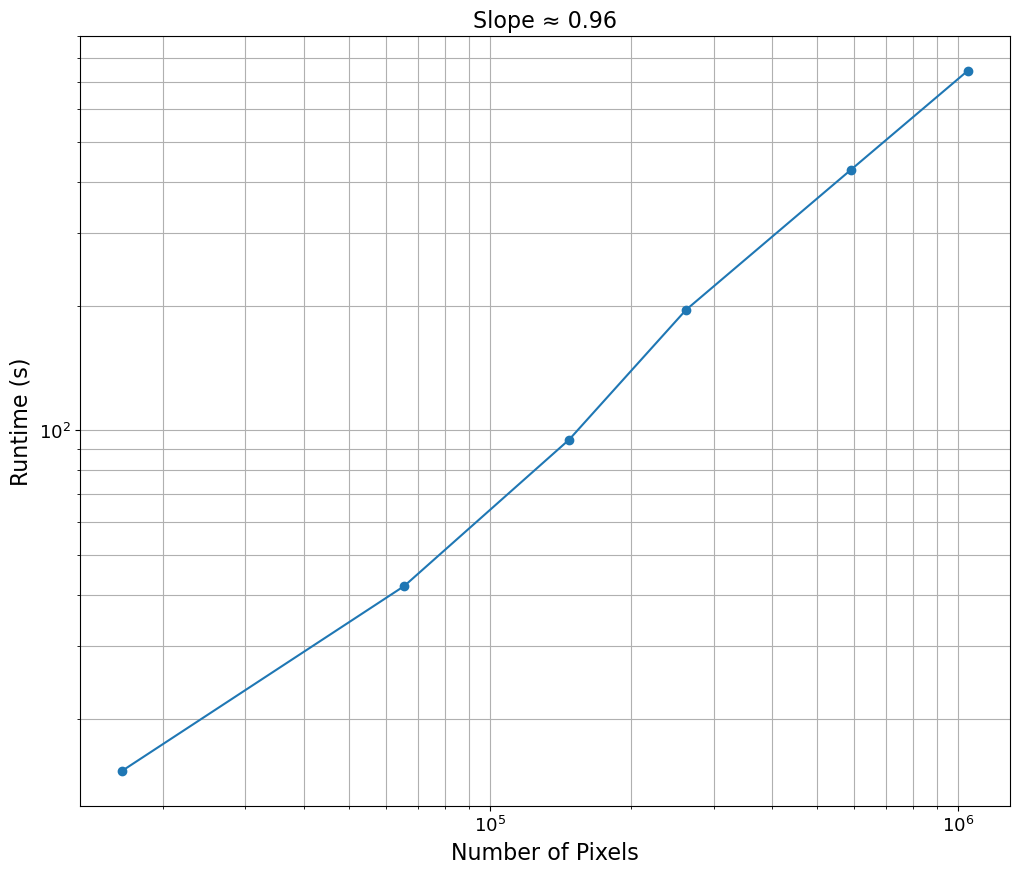

Estimated slope: 0.9618832580217541


In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13
})

sizes = np.array([128,256,384,512,768,1024])
pixels = sizes**2
times = np.array([15,42,95,196,428,744])

# ajuste linear log-log
log_pixels = np.log(pixels)
log_times = np.log(times)
coef = np.polyfit(log_pixels, log_times, 1)

plt.figure(figsize=(12,10))
plt.loglog(pixels, times, 'o-')
plt.xlabel("Number of Pixels")
plt.ylabel("Runtime (s)")
plt.title(f"Slope ≈ {coef[0]:.2f}")
plt.grid(True, which="both")
plt.savefig("runtime_loglog.pdf", dpi=600, bbox_inches='tight', transparent=True)

#plt.savefig(f'{dir_output}/graph_ssim_high_no_sorted.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

print("Estimated slope:", coef[0])

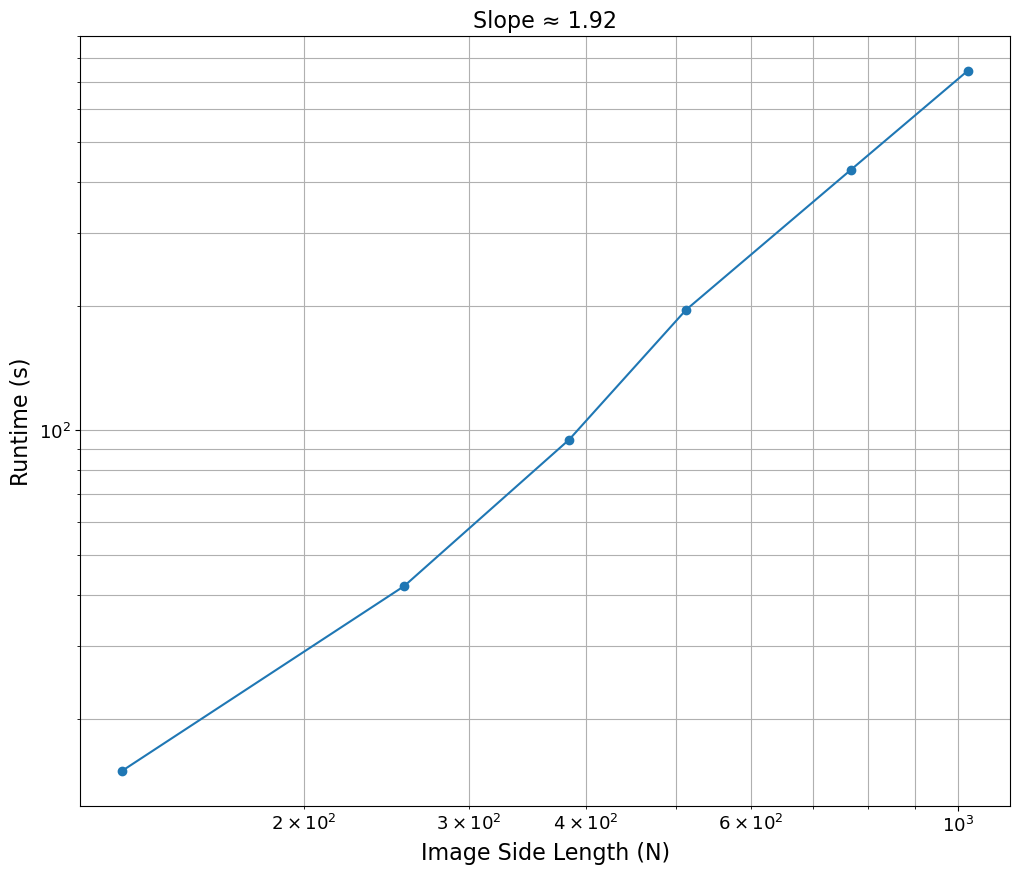

Estimated slope (side length): 1.9237665160435082


In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13
})

sizes = np.array([128,256,384,512,768,1024])   # lado da imagem
times = np.array([15,42,95,196,428,744])

# ajuste linear log-log
log_sizes = np.log(sizes)
log_times = np.log(times)
coef_side = np.polyfit(log_sizes, log_times, 1)

plt.figure(figsize=(12,10))
plt.loglog(sizes, times, 'o-')
plt.xlabel("Image Side Length (N)")
plt.ylabel("Runtime (s)")
plt.title(f"Slope ≈ {coef_side[0]:.2f}")
plt.grid(True, which="both")

plt.savefig("runtime_loglog_side.pdf", dpi=600,
            bbox_inches='tight', transparent=True)

plt.show()

print("Estimated slope (side length):", coef_side[0])


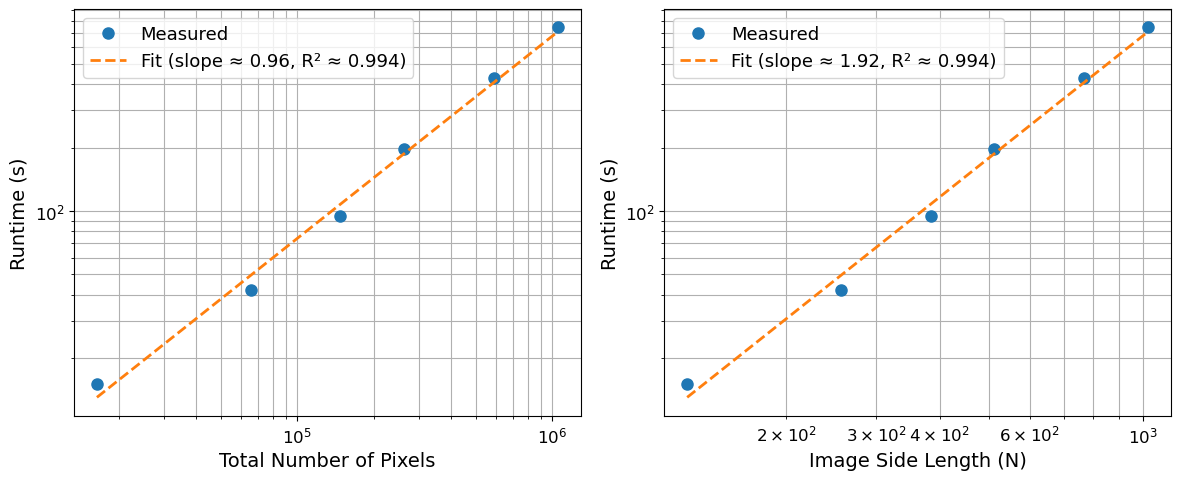

Slope (pixels): 0.9618832580217541
R² (pixels): 0.9935848568618634
Slope (side length): 1.9237665160435082
R² (side length): 0.9935848568618634


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Dados
# =========================
sizes = np.array([128,256,384,512,768,1024])   # lado da imagem
pixels = sizes**2                              # número total de pixels
times = np.array([15,42,95,196,428,744])

# =========================
# Configuração visual
# =========================
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# =========================
# Ajuste log-log (pixels)
# =========================
log_pixels = np.log(pixels)
log_times = np.log(times)

coef_pixels = np.polyfit(log_pixels, log_times, 1)
fit_pixels = np.poly1d(coef_pixels)

# R² pixels
residuals_pixels = log_times - fit_pixels(log_pixels)
ss_res_pixels = np.sum(residuals_pixels**2)
ss_tot_pixels = np.sum((log_times - np.mean(log_times))**2)
r2_pixels = 1 - ss_res_pixels/ss_tot_pixels

# =========================
# Ajuste log-log (lado)
# =========================
log_sizes = np.log(sizes)

coef_side = np.polyfit(log_sizes, log_times, 1)
fit_side = np.poly1d(coef_side)

# R² lado
residuals_side = log_times - fit_side(log_sizes)
ss_res_side = np.sum(residuals_side**2)
ss_tot_side = np.sum((log_times - np.mean(log_times))**2)
r2_side = 1 - ss_res_side/ss_tot_side

# =========================
# Figura com subplots lado a lado
# =========================
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ---- Gráfico 1: Pixels ----
axes[0].loglog(pixels, times, 'o', markersize=8, label='Measured')
axes[0].loglog(pixels, np.exp(fit_pixels(log_pixels)), '--',
               linewidth=2,
               label=f'Fit (slope ≈ {coef_pixels[0]:.2f}, R² ≈ {r2_pixels:.3f})')
axes[0].set_xlabel("Total Number of Pixels")
axes[0].set_ylabel("Runtime (s)")
axes[0].grid(True, which="both")
axes[0].legend()

# ---- Gráfico 2: Lado da imagem ----
axes[1].loglog(sizes, times, 'o', markersize=8, label='Measured')
axes[1].loglog(sizes, np.exp(fit_side(log_sizes)), '--',
               linewidth=2,
               label=f'Fit (slope ≈ {coef_side[0]:.2f}, R² ≈ {r2_side:.3f})')
axes[1].set_xlabel("Image Side Length (N)")
axes[1].set_ylabel("Runtime (s)")
axes[1].grid(True, which="both")
axes[1].legend()

plt.tight_layout()

# =========================
# Salvar figura
# =========================
plt.savefig("runtime_scaling_dual_loglog.pdf",
            dpi=600,
            bbox_inches='tight',
            transparent=True)

plt.show()

# =========================
# Imprimir resultados
# =========================
print("Slope (pixels):", coef_pixels[0])
print("R² (pixels):", r2_pixels)
print("Slope (side length):", coef_side[0])
print("R² (side length):", r2_side)
